In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')


In [3]:
df.head()


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


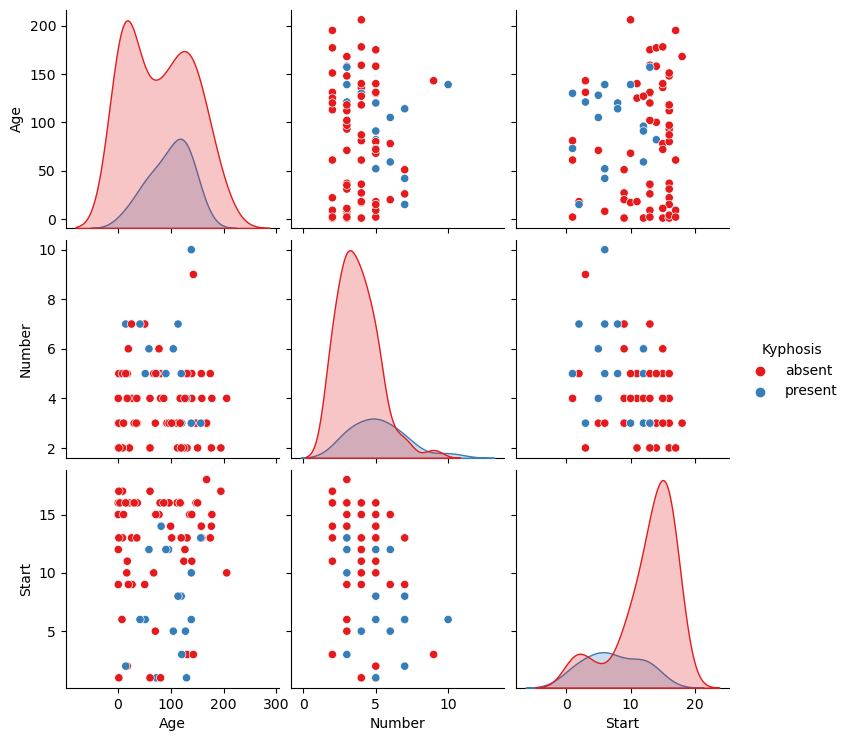

In [5]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [9]:
from sklearn.tree import DecisionTreeClassifier


In [10]:
dtree = DecisionTreeClassifier()


In [11]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
predictions = dtree.predict(X_test)


In [13]:
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

      absent       0.96      0.92      0.94        24
     present       0.00      0.00      0.00         1

    accuracy                           0.88        25
   macro avg       0.48      0.46      0.47        25
weighted avg       0.92      0.88      0.90        25



In [17]:
from six import StringIO

from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [20]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())  

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
rfc = RandomForestClassifier(n_estimators=200)


In [23]:
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [24]:
rfc_pred = rfc.predict(X_test)


In [25]:
print(classification_report(y_test, rfc_pred))


              precision    recall  f1-score   support

      absent       0.96      1.00      0.98        24
     present       0.00      0.00      0.00         1

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
